# Regions

This notebook is designed to verify the science regions are performing correctly. 

In [9]:
from os import path, getcwd
from sys import path as pythonpath
pythonpath.append(path.join(getcwd(), '..'))
import config_utils
import regions
from mw_plot import MWSkyMap, MWSkyMapBokeh
from astropy_healpix import HEALPix
from astropy import units as u
from astropy.coordinates import Galactic, TETE, SkyCoord, ICRS
from astropy.table import Table, Column
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Configure path to local repository
root_dir = '/Users/rstreet/software/rgps'

In [3]:
# Load essential configuration
sim_config = config_utils.read_config(path.join(getcwd(), '..', 'config', 'sim_config.json'))


In [4]:
science_regions = regions.load_regions_from_file(sim_config,
                                                         path.join(root_dir, 'region_data', 'rgps_science_regions_Open_Clusters_catalog.json'))

In [5]:
science_regions

{'Open_Clusters_catalog': {'F062': [],
  'F087': [],
  'F106': [],
  'F129': [],
  'F158': [],
  'F184': [],
  'F213': [<regions.CelestialRegion at 0x15b035b90>,
   ...],
  'F146': [],
  'G150': [],
  'P127': []}}

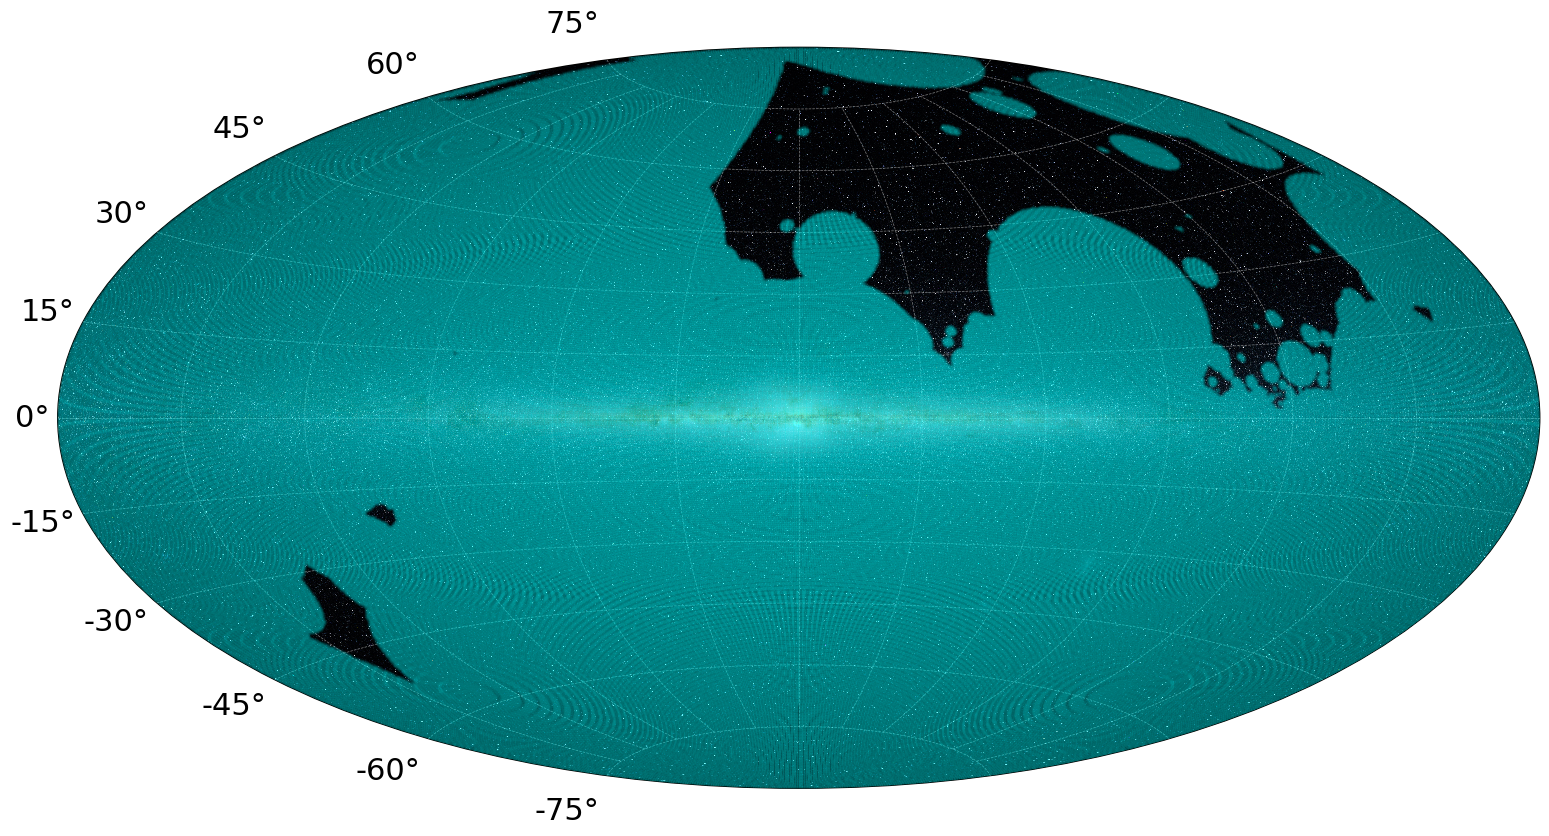

In [7]:
all_region_list = science_regions['Open_Clusters_catalog']['F213']
r_merge = regions.combine_regions_pixels(all_region_list)

mw1 = MWSkyMap(projection='aitoff', grayscale=False, grid='galactic', background='infrared', figsize=(16, 10))
s = r_merge.pixels_to_skycoords()
s = s.transform_to('icrs')
#mw1.scatter(s.ra.deg * u.deg, s.dec.deg * u.deg, c=r_merge.region_map[r_merge.pixels], cmap='Blues', s=5, alpha=0.4)
mw1.scatter(s.ra.deg * u.deg, s.dec.deg * u.deg, c='cyan', s=5, alpha=0.04)
plt.rcParams.update({'font.size': 22})
plt.tight_layout()

In [13]:
val1 = np.nan
val2 = np.arange(0,10,1)

if not np.isnan(val1).all():
    print('Got here')